# Team #4_Midterm Project

# Introduction

## Context:
* This dataset contains information about people who were able to purchase an SUV based on other factors in their lives.  

* In 3-4 sentences state what you will be doing in this project.
 - We will be using the data to predict whether or not a person will purchase an SUV based on their age. We will be using a logistic regression model and a decision tree model to predict the outcome, we will also be using a confusion matrix to evaluate the accuracy of our models and improving the accuracy score to get 81% or higher.
 
* Additionally, state which machine learning type you will be using in this project and why.
 - We will be using a classification model (Logistic Regression) and Decision Tree


## Objective:

- What are the factors that enable people to purchase a new SUV? Gender, Age nd Estimated Salary.
- To predict "Purchase" as our dependent or target (y = 'Purchase') variable based on the independent (X) variables

## Data Description:

* User ID: User's ID (the SUV purchaser)
* Gender: User's gender 
* Age: User's age  
* Estimated: User's income
* Purchased: Whether the user purchased an SUV or not. (This is the target variable).

# Importing Libraries

In [3]:
import numpy as np                # for numerical data 
import pandas as pd               # for data analysis
import matplotlib.pyplot as plt   # for data visualization
import seaborn as sns             # for statistical plotting 
import pylab as plot

%matplotlib inline               
import math

from sklearn.impute import SimpleImputer   # for imputing missing values
from sklearn.preprocessing import StandardScaler  # for data transformation and data pre-processing befor model-building

from sklearn.model_selection import train_test_split # for splitting dataset into training and test sets

from sklearn.linear_model import LogisticRegression  # for building logistic regression (classification) model
from sklearn.tree import DecisionTreeClassifier      # for building a decision tree model 

from sklearn import metrics  # for getting model performance scores 
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score  
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix  # for creating the confustion matrix 
from sklearn.metrics import plot_confusion_matrix


## Reading Data

In [9]:
df = pd.read_csv('suv_dataset.csv')

    User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0            19000          0
1  15810944    Male  35.0            20000          0
2  15668575  Female  26.0            43000          0
3  15603246  Female  27.0            57000          0
4  15804002    Male  19.0            76000          0


## Basic Data Exploration (data processing)

In [10]:
suv = df.copy()

In [11]:
suv.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000,0
1,15810944,Male,35.0,20000,0
2,15668575,Female,26.0,43000,0
3,15603246,Female,27.0,57000,0
4,15804002,Male,19.0,76000,0


In [12]:
suv.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46.0,41000,1
396,15706071,Male,51.0,23000,1
397,15654296,Female,50.0,20000,1
398,15755018,Male,36.0,33000,0
399,15594041,Female,49.0,36000,1


In [13]:
suv.shape

(400, 5)

In [14]:
suv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              390 non-null    float64
 3   EstimatedSalary  400 non-null    int64  
 4   Purchased        400 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 15.8+ KB


In [15]:
suv.isnull().sum()

User ID             0
Gender              0
Age                10
EstimatedSalary     0
Purchased           0
dtype: int64

In [18]:
suv.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,390.000000,400.000000,400.000000
mean,1.569154e+07,37.764103,69742.500000,0.357500
std,7.165832e+04,10.531175,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,30.000000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## EDA (Exploratory Data Analysis)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab as plot
import math

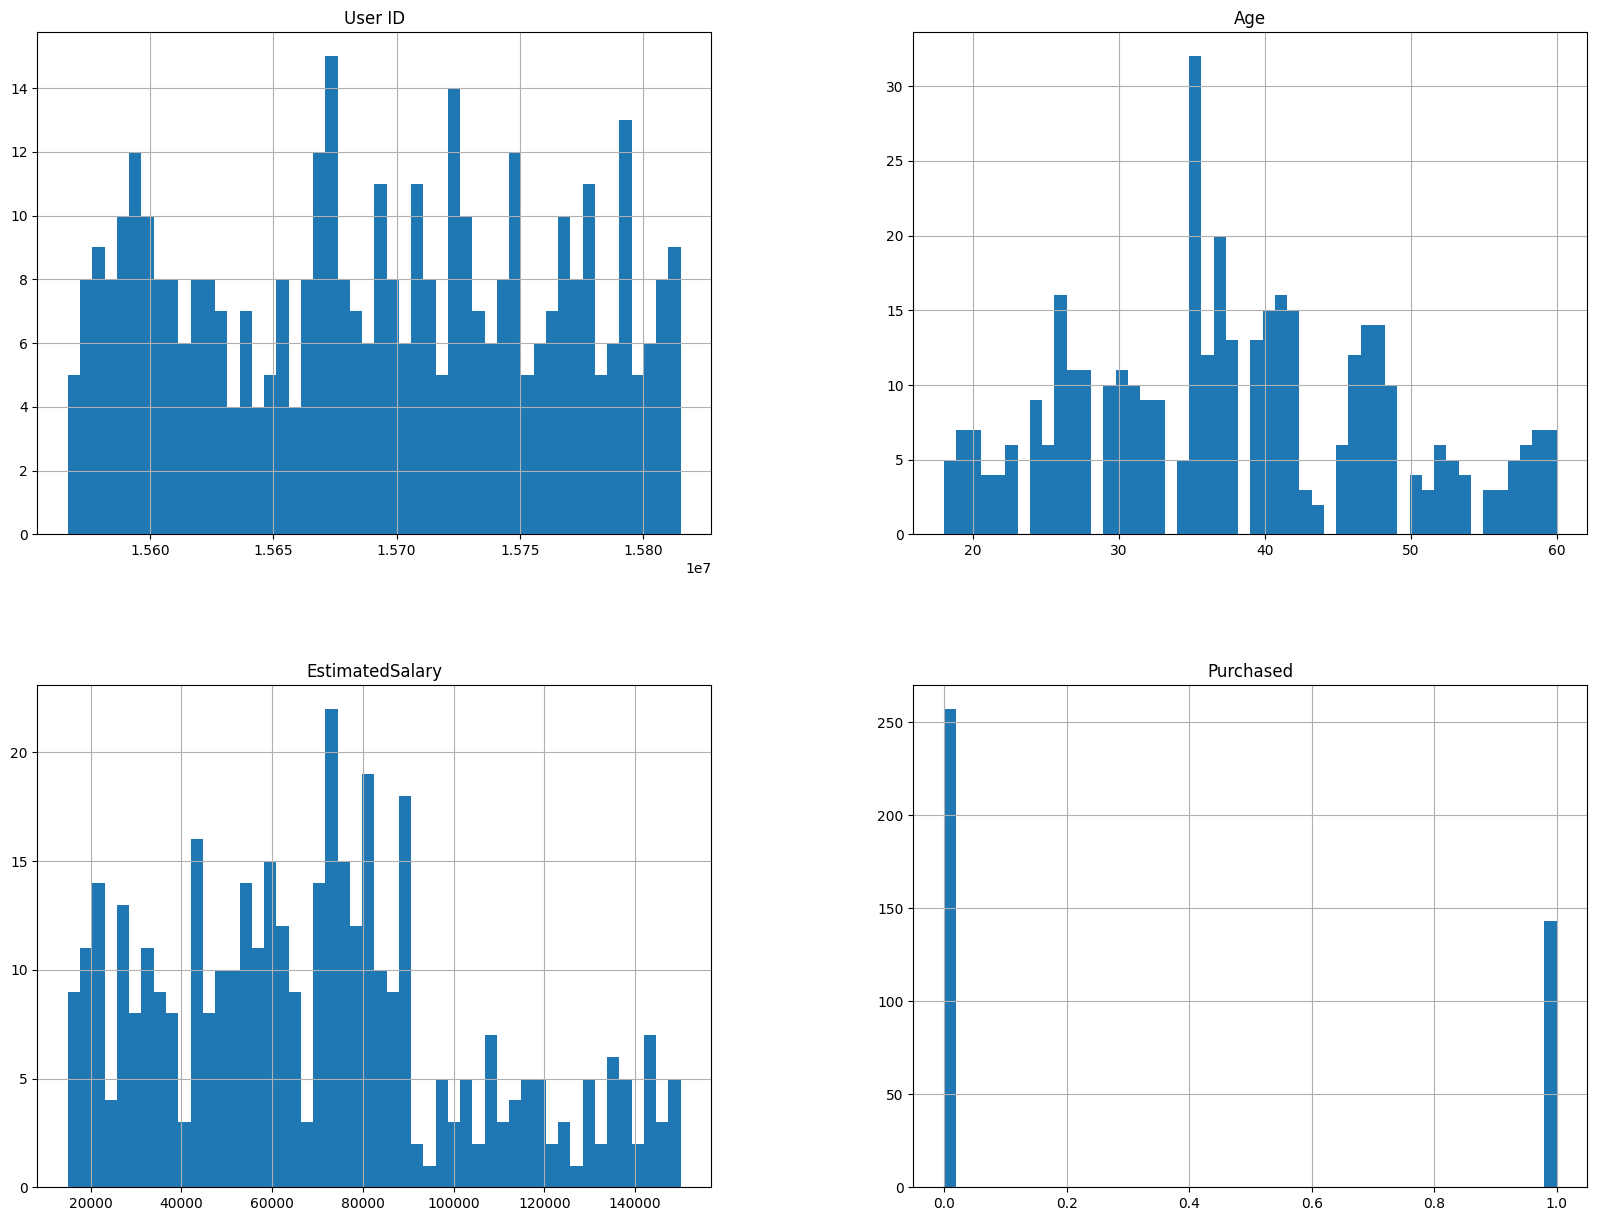

In [20]:
suv.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot: xlabel='Purchased', ylabel='count'>

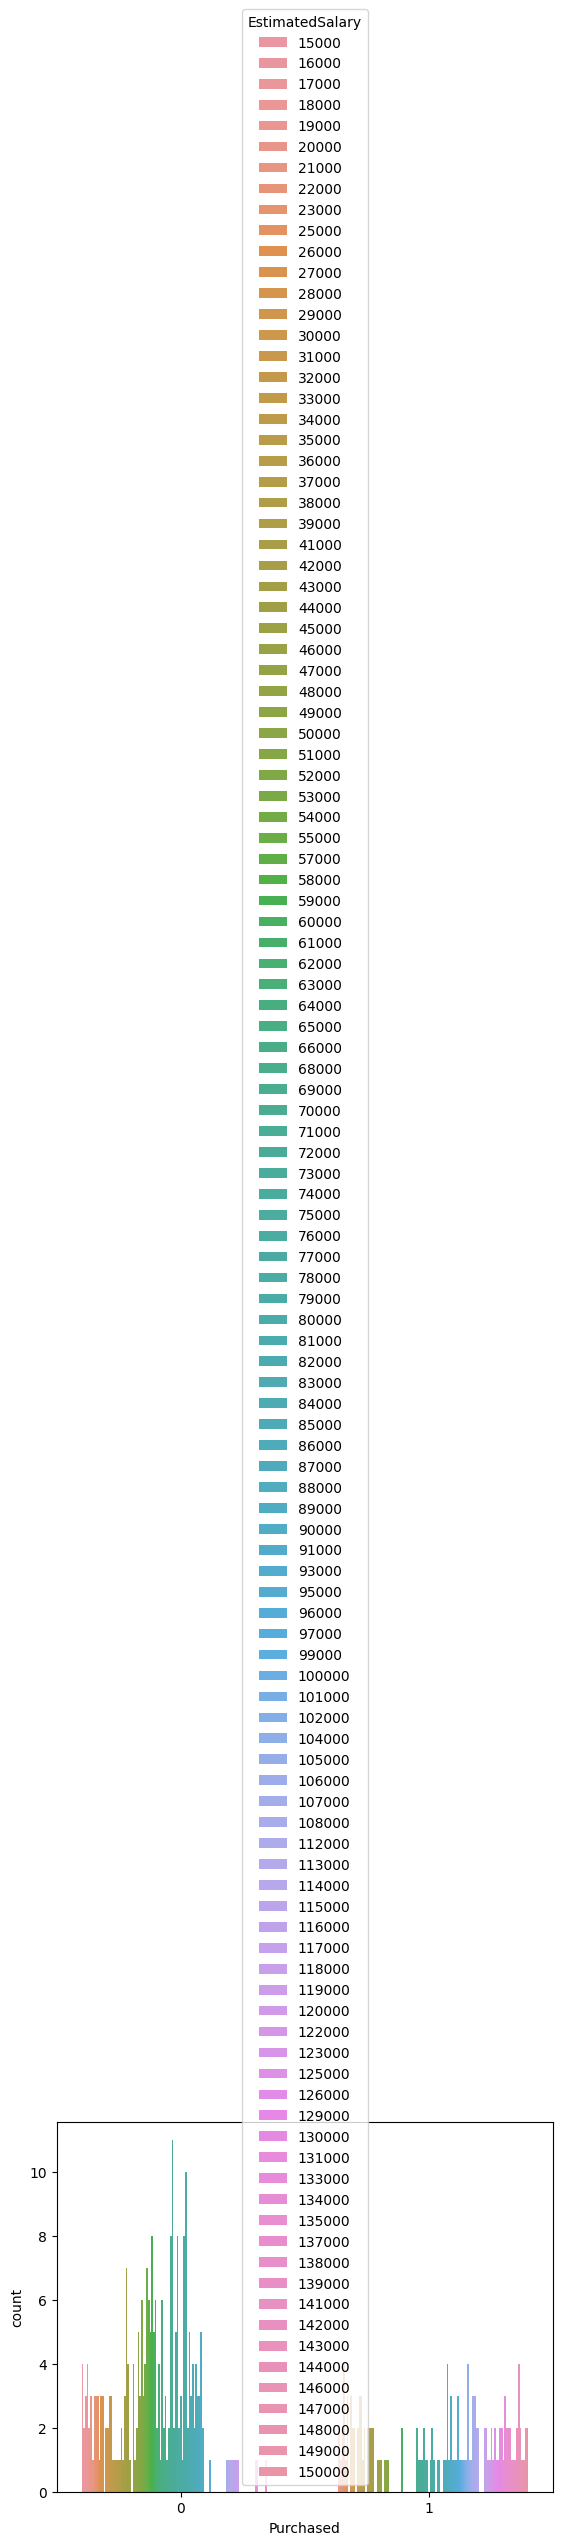

In [21]:
sns.countplot(x='Purchased', hue='EstimatedSalary', data=suv)

<AxesSubplot: xlabel='Purchased', ylabel='count'>

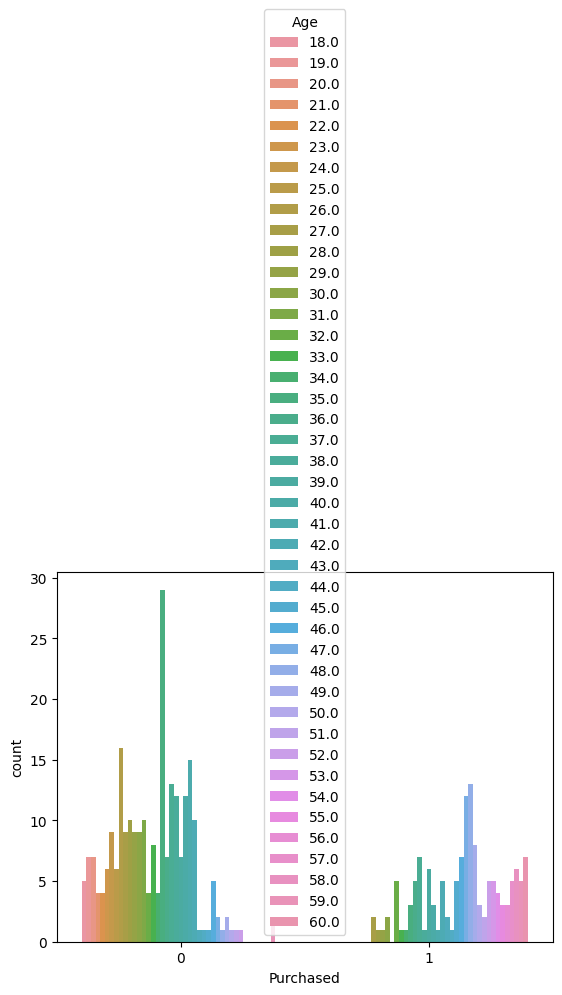

In [22]:
sns.countplot(x='Purchased', hue='Age', data=suv)

<AxesSubplot: xlabel='Purchased', ylabel='count'>

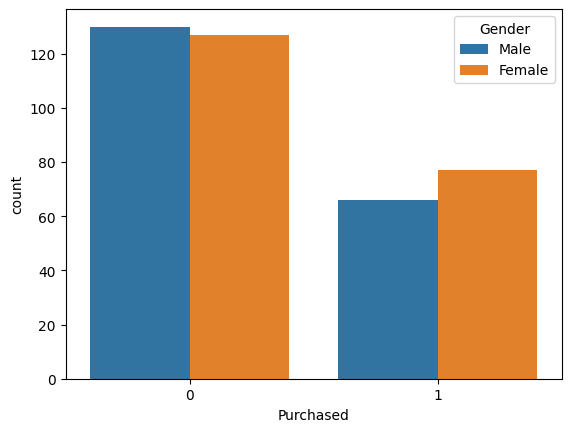

In [23]:
sns.countplot(x='Purchased', hue='Gender', data=suv)

<AxesSubplot: xlabel='Purchased', ylabel='count'>

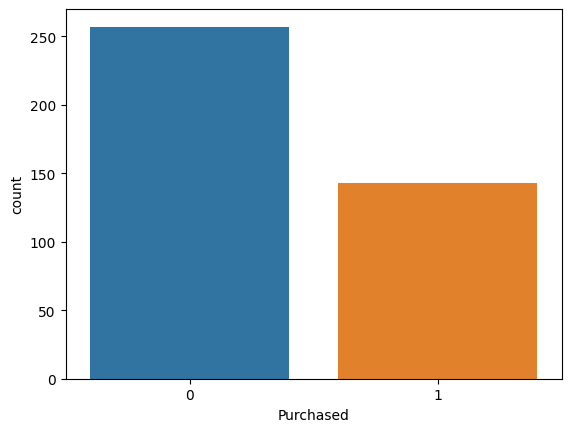

In [24]:
sns.countplot(x='Purchased', data=suv)


<AxesSubplot: ylabel='Frequency'>

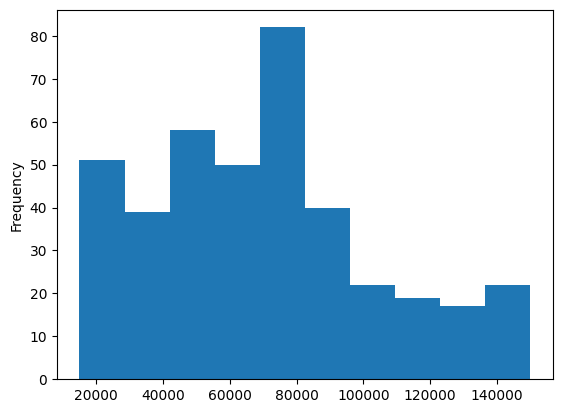

In [27]:
suv['EstimatedSalary'].plot.hist()

<AxesSubplot: ylabel='Frequency'>

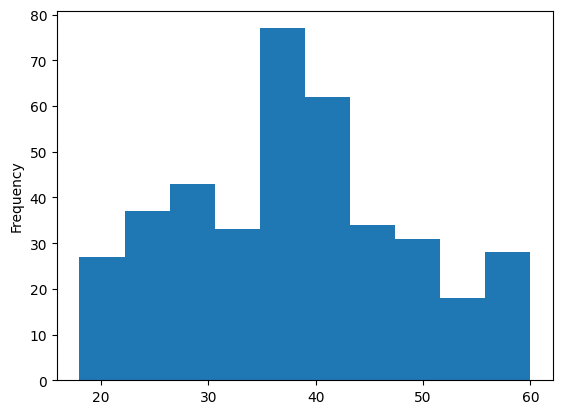

In [28]:
suv['Age'].plot.hist()

<AxesSubplot: >

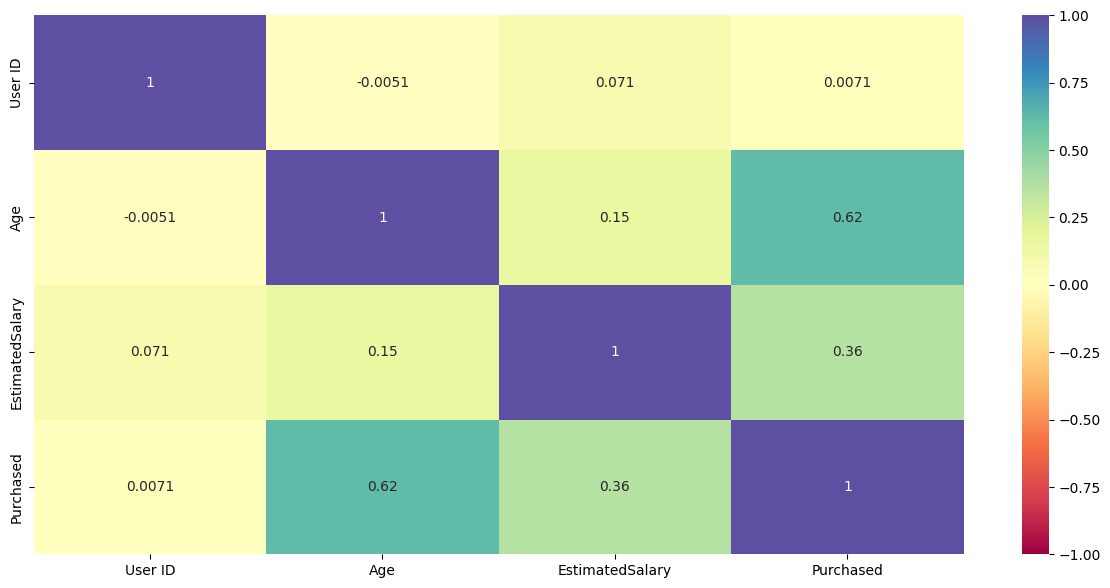

In [30]:
plt.figure(figsize=(15,7))
sns.heatmap(suv.corr(), annot=True, vmin=-1, cmap='Spectral')

## Data Preprocessing